In [1]:
#Importing the data and necassary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [2]:
#Descriptive Statistics
df.describe(include="all")

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [3]:
df.shape

(48842, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [5]:
#Checking for missing values
print(df.isnull().sum())
#No missing values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [6]:
#Checking for duplicates
df.duplicated()
df.duplicated().sum()
#In this case dublicates would be okay since the data is binned

40012

In [7]:
#Checking for outliers
#y Upper and Lower Bound
y_upper = 0 + (0-0)* 1.5
y_lower = 0 - (0-0)* 1.5
print("Upper bound for y is", y_upper, "and lower bound is", y_lower)

Upper bound for y is 0.0 and lower bound is 0.0


In [8]:
#Counting the number of outliers
outlier_y_low = df["y"] < y_lower
outlier_y_high = df["y"] > y_upper
len(df["y"]) - (len(df["y"][outlier_y_low]) + len(df["y"][outlier_y_high]))

37155

In [9]:
for col in df.drop(columns = ["flag","y"]):
    df[col] = df[col].str.split(". ", n=1, expand=True)[1]

In [10]:
matplotlib.style.use("ggplot")

def create_plot(col_name):
    table_var = pd.pivot_table(data = df, index = col_name, columns = "y", aggfunc="count")["flag"]
    table_plot = table_var.plot.bar(stacked = True, color = ["steelblue", "darkorange"])
    table_plot.legend(bbox_to_anchor = (1.01, 0.6))
    plt.show()   

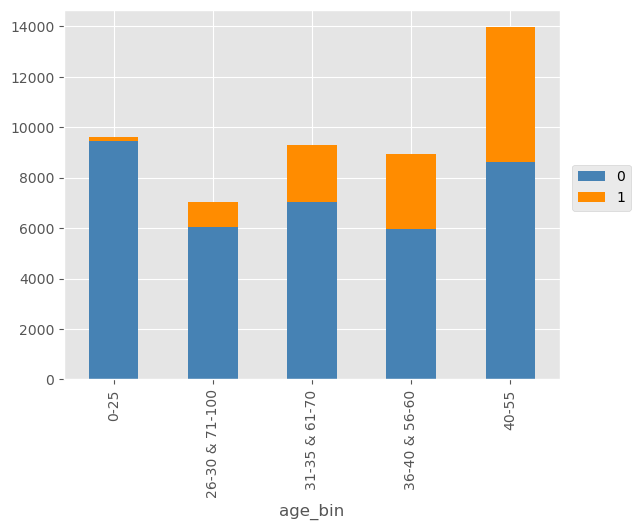

In [11]:
#Creating plot for age
create_plot("age_bin")

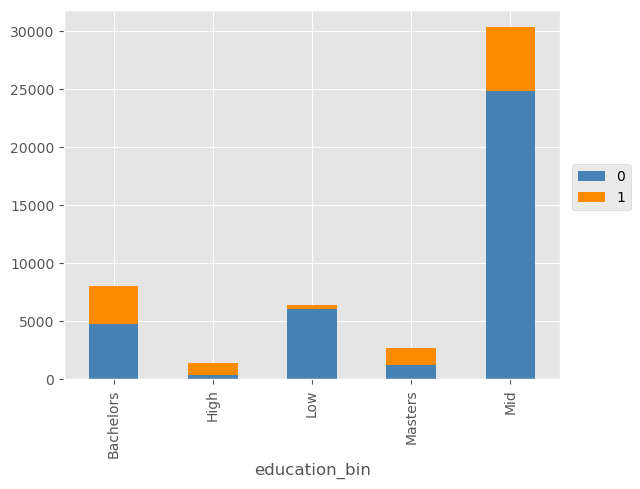

In [12]:
create_plot("education_bin")

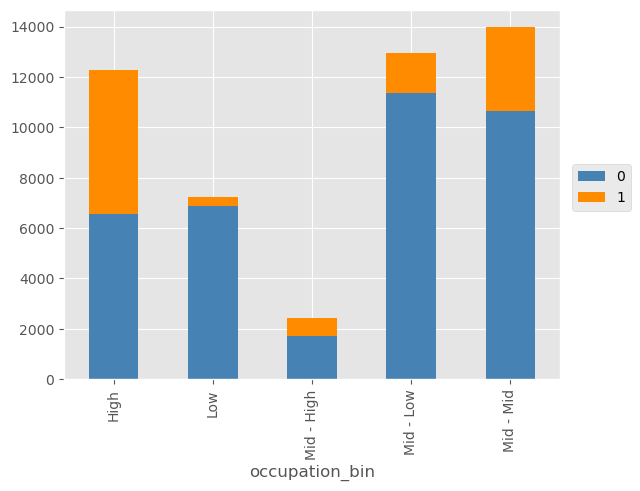

In [13]:
create_plot("occupation_bin")

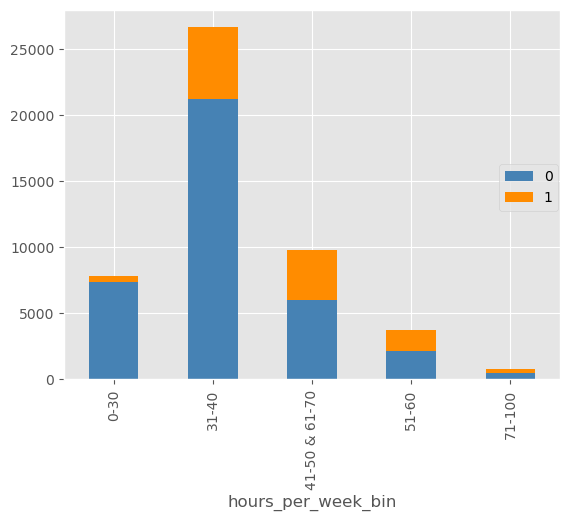

In [14]:
create_plot("hours_per_week_bin")

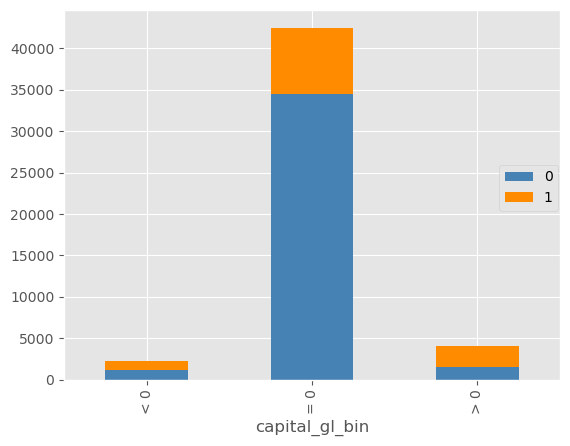

In [15]:
create_plot("capital_gl_bin")

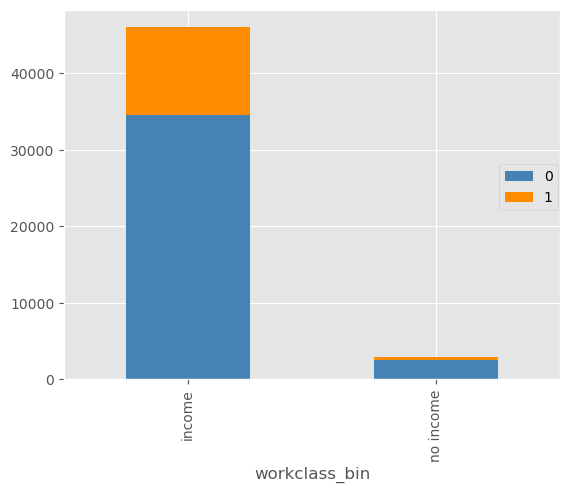

In [16]:
create_plot("workclass_bin")

In [17]:
df_copy = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
for col in df_copy.drop(columns = ["flag","y"]):
    df_copy[col] = df_copy[col].str.split(". ", n=1, expand=True)[1]
df_copy.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0


In [18]:
#Creating testing and training data (One Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

train = df_copy[df_copy["flag"] == "train"].drop(["flag","education_num_bin"], axis = 1)
test =  df_copy[df_copy["flag"] == "test"].drop(["flag","education_num_bin"], axis = 1)
X_train = train.drop("y", axis = 1)
y_train = train["y"]
X_test = test.drop("y", axis = 1)
y_test = test["y"]

#Create Dummies
encoder = OneHotEncoder()
X_train = encoder.fit_transform(X_train).toarray()
X_test = encoder.fit_transform(X_test).toarray()

## Part2: Finding Optimal Value of a key Ensemble Method Hyper-parameter

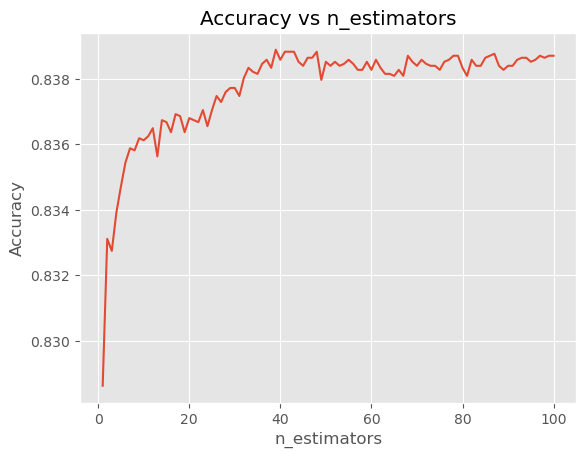

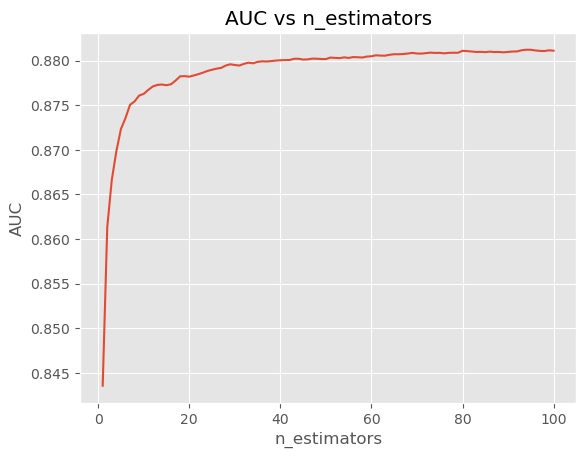

In [19]:
# create empty lists to store accuracy and AUC for different n_estimators
accuracy_list = []
auc_list = []

# try different values of n_estimators
for n in range(1, 101):
    # train a Random Forest model with n_estimators
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    
    # make predictions on the validation set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # calculate accuracy and AUC
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    # append to the lists
    accuracy_list.append(accuracy)
    auc_list.append(auc)
    
# plot the line graphs
n_list = np.arange(1, 101)
plt.plot(n_list, accuracy_list)
plt.title("Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

plt.plot(n_list, auc_list)
plt.title("AUC vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

## Part 3: Building a Random Forest Model

In [ ]:
#1. Write your observations about the Classifier’s behavior with respect to the number of estimators

#For the Random Forest the accuracy seems to fluctuates but the AUC steadily increases then level offs around 400 estimators. 
#For the Ada Boost the accuracy and AUC grpahs are opposites. The accuracy sharply drops then levels off, the AUC shrply rises then levels off
#For Gradient Boost the graph start of different then resemble a similar shape after 250 estimators
#Looking at XGB the accuracy and AUC grpahs are quite similar

In [ ]:
#2. Is there an optimal value of the estimator within the given range?

#For Random Forest classifer the optimal range for accuracy and AUC is 350 and 450 respectively
#For Ada Boost the optimal range for accuracy and AUC is 50 and 100 respectively
#For Gradient Boost the optimal range for accuracy and AUC is 50 and 200 respectively
#For XGB the optimal range for both accuracy and AUC is 50 

In [20]:
n_estimators = [50,100,150,200,250,300,350,400,450,500]

accuracies = []
aucs = []

for n in n_estimators:
    # Train a Random Forest model with n_estimators=n
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train.values.ravel())

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute accuracy and AUC
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Append results to lists
    accuracies.append(acc)
    aucs.append(auc)

In [21]:
print("Accuracy Score for Random Forest:", acc)
print("AUC for Random Forest:", auc)

Accuracy Score for Random Forest: 0.837847798046803
AUC for Random Forest: 0.8817139086850164


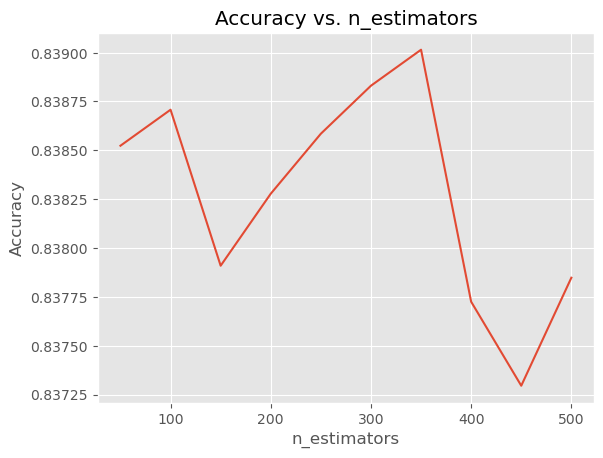

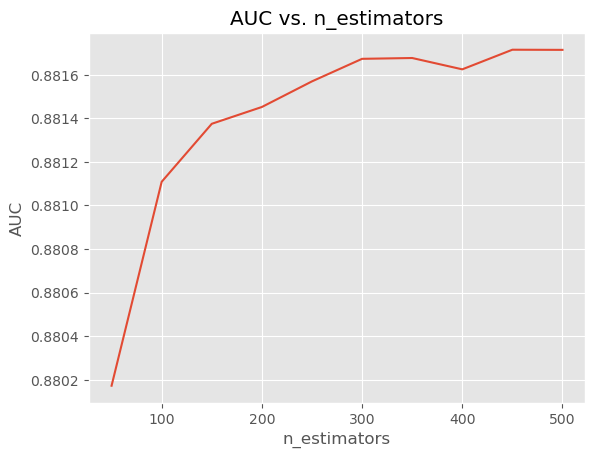

In [22]:
# Plotting accuracy 
plt.plot(n_estimators, accuracies)
plt.title("Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

# Plotting AUC 
plt.plot(n_estimators, aucs)
plt.title("AUC vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

### Using AdaBoost

In [23]:
# Initialize empty lists to store the results
accuracies1 = []
aucs1 = []

# Train an AdaBoost model for each value of n_estimators
for n in n_estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train.values.ravel())

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute accuracy and AUC
    acc1 = accuracy_score(y_test, y_pred)
    auc1 = roc_auc_score(y_test, y_proba)

    # Append results to lists
    accuracies1.append(acc1)
    aucs1.append(auc1)

In [24]:
print("Accuracy Score for AdaBoost:", acc1)
print("AUC for AdaBoost:", auc1)

Accuracy Score for AdaBoost: 0.8447884036607088
AUC for AdaBoost: 0.8973772718500216


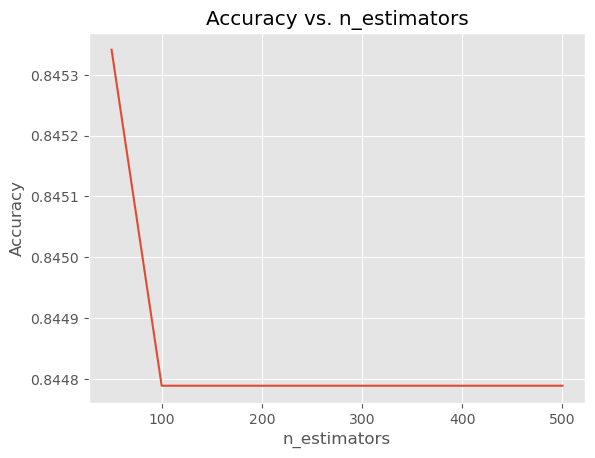

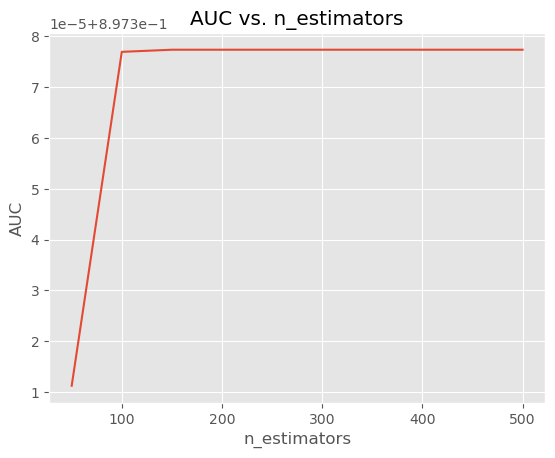

In [25]:
#Plotting accuracy
plt.plot(n_estimators, accuracies1)
plt.title("Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

#Plotting AUC
plt.plot(n_estimators, aucs1)
plt.title("AUC vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

### Using Gradient Boosting

In [26]:
accuracies2 = []
aucs2 = []

# Train a Gradient Boosting model for each value of n_estimators
for n in n_estimators:
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train.values.ravel())

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute accuracy and AUC
    acc2 = accuracy_score(y_test, y_pred)
    auc2 = roc_auc_score(y_test, y_proba)

    # Append results to lists
    accuracies2.append(acc2)
    aucs2.append(auc2)

In [27]:
print("Accuracy Score of Gradient Boosting:", acc2)
print("AUC of Gradient Boosting:", auc2)

Accuracy Score of Gradient Boosting: 0.8447269823720902
AUC of Gradient Boosting: 0.8985172611568718


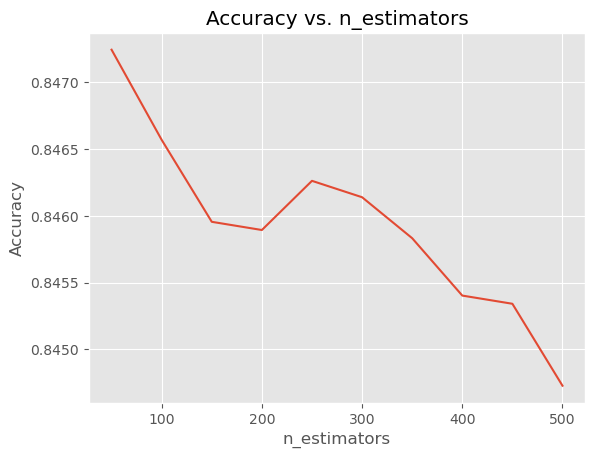

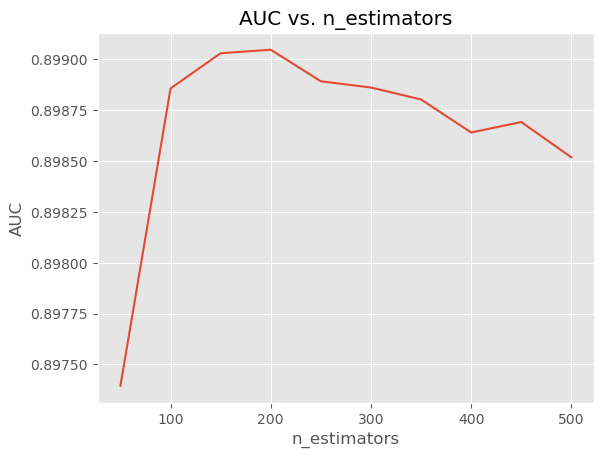

In [28]:
#Plotting accuracy
plt.plot(n_estimators, accuracies2)
plt.title("Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

#Plotting AUC
plt.plot(n_estimators, aucs2)
plt.title("AUC vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

### Using XGB

In [29]:
accuracies3 = []
aucs3 = []

# Train an XGBoost model for each value of n_estimators
for n in n_estimators:
    model = xgb.XGBClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train.values.ravel())

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute accuracy and AUC
    acc3 = accuracy_score(y_test, y_pred)
    auc3 = roc_auc_score(y_test, y_proba)

    # Append results to lists
    accuracies3.append(acc3)
    aucs3.append(auc3)

In [30]:
print("Accuracy Score of XGB Classifier:", acc3)
print("AUC of XGB Classifier:", auc3)

Accuracy Score of XGB Classifier: 0.8397518579939807
AUC of XGB Classifier: 0.8870875092341852


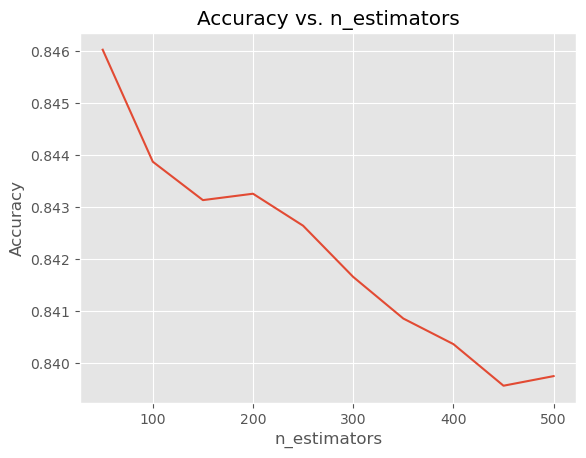

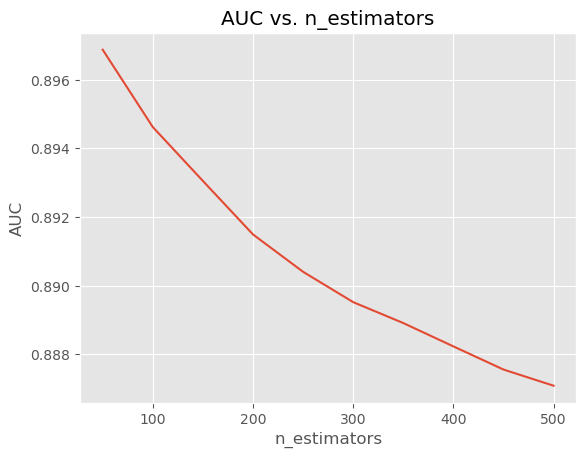

In [31]:
# Plotting Accuracy
plt.plot(n_estimators, accuracies3)
plt.title("Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

#Plotting AUC
plt.plot(n_estimators, aucs3)
plt.title("AUC vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

## Part 5: Compare Performance

In [36]:
scores_df = pd.DataFrame({"Random Forest": [acc, auc],
                          "AdaBoost": [acc1, auc1],
                          "Gradient Boost": [acc2, auc2],
                          "XGB": [acc3, auc3]},
                         index=["Accuracy", "AUC"])

# Print the DataFrame
scores_df

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.837848,0.844788,0.844727,0.839752
AUC,0.881714,0.897377,0.898517,0.887088
